## Arboles de Decisión

In [8]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y abalisis de estructuras de datos
import numpy as np # Calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt #Creación de graficos en dos dimensiones
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import re
#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
# Lectura de datos en Python para cargarlos en la variable datos
data = pd.read_csv('D:/UNAD/Evidencias de Aprendizaje/Semestre 9/Análisis de Datos/Tarea 3/DataSet/Arboles de Decision/winequality-red.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
data.shape

(1599, 12)

In [11]:
#Descripcion de los datos
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
#Verificamos si hay valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

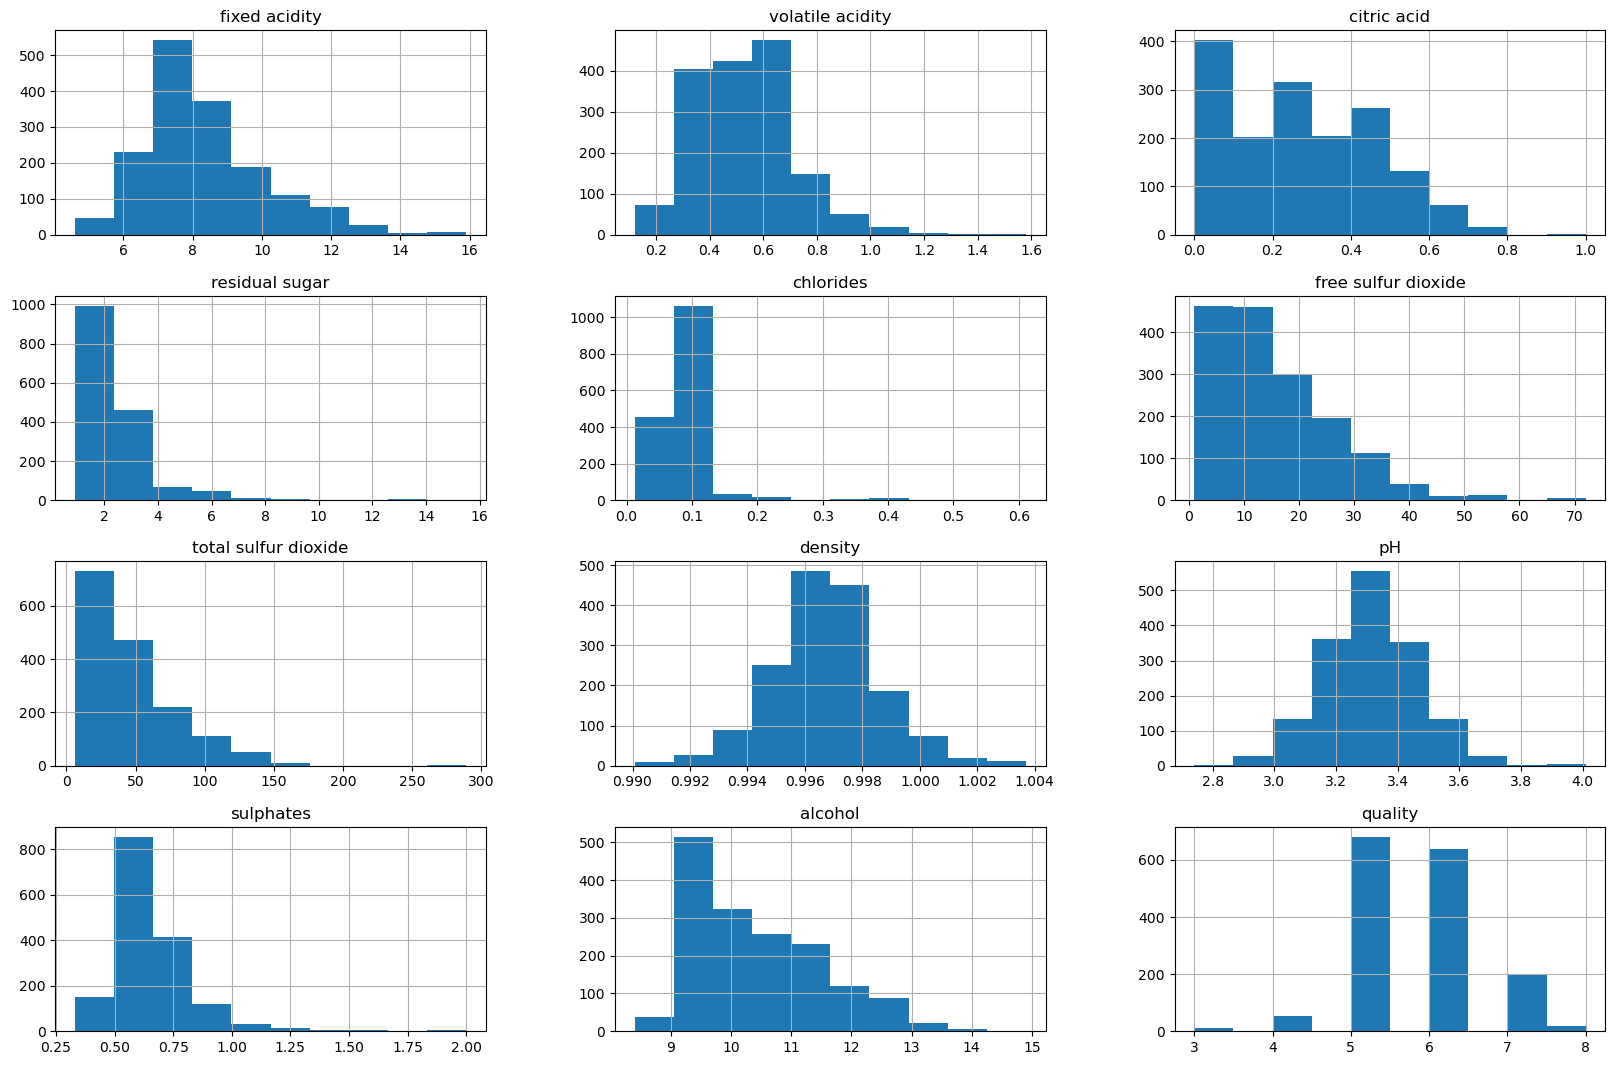

In [14]:
# se muestra un histograma para observar los datos agregados 
data.hist(figsize =(20,13))
plt.show()

podemos observar en el histograma que el dataset está balanceado 

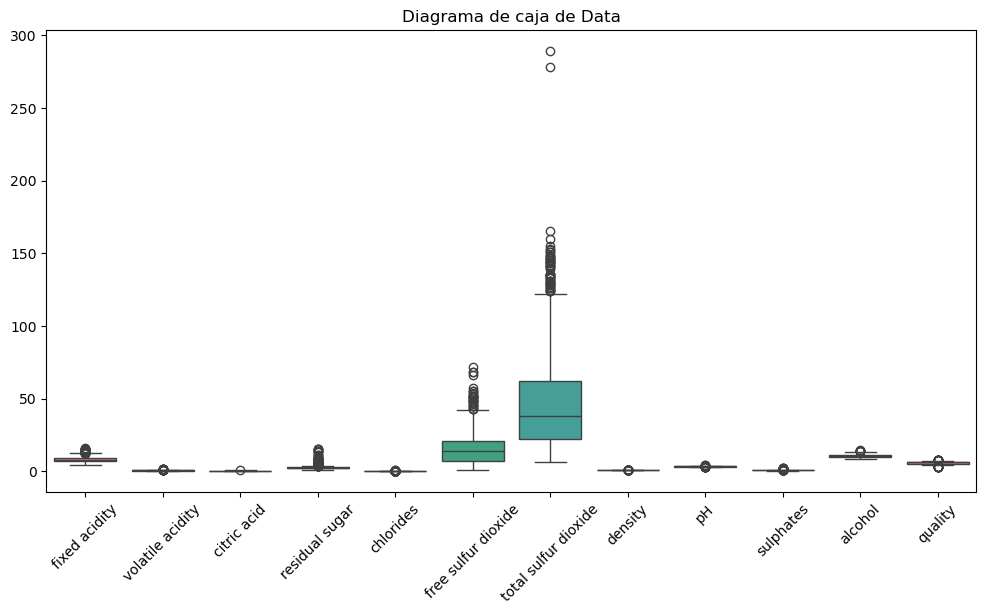

In [16]:
# Identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data = data  )
plt.title('Diagrama de caja de Data')
plt.xticks(rotation=45)
plt.show()

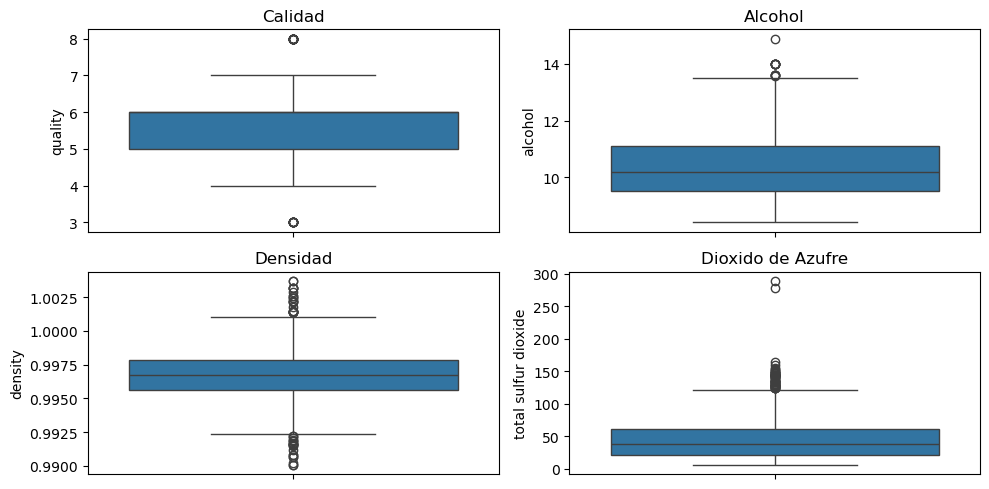

In [18]:
# Figuras de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data['quality'], ax = axs[0,0]).set_title("Calidad")
plt2 = sns.boxplot(data['alcohol'], ax = axs[0,1]).set_title("Alcohol")
plt3 = sns.boxplot(data['density'], ax = axs[1,0]).set_title("Densidad")
plt1 = sns.boxplot(data['total sulfur dioxide'], ax = axs[1,1]).set_title("Dioxido de Azufre")

plt.tight_layout()

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

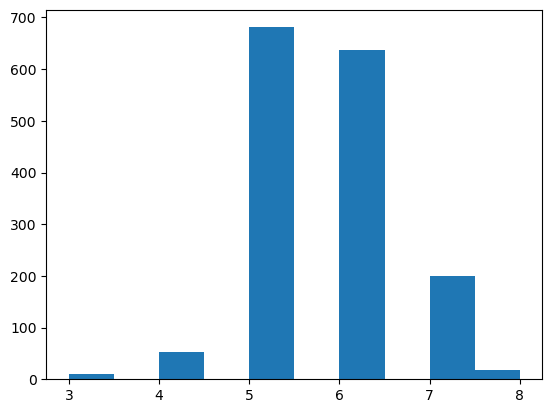

In [20]:
plt.hist(data.quality)

Podemos observar por medio del histograma, que el dataset está balanceado

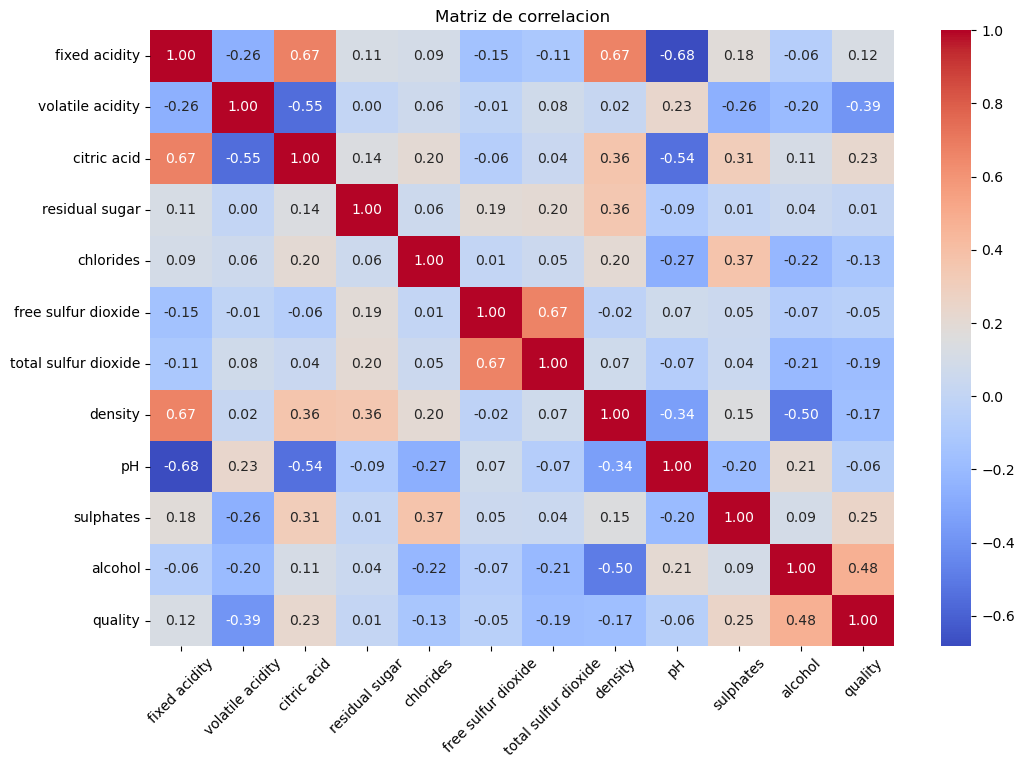

In [22]:
# Analisis de correlacion
correlacion = data.corr()
plt.figure(figsize =(12,8))
sns.heatmap(correlacion, annot = True, cmap ='coolwarm', fmt =".2f")
plt.title('Matriz de correlacion')
plt.xticks(rotation=45)
plt.show()

In [23]:
# verifica que variables tienen más correlaciones
correlacion_variableobjetivo = correlacion['quality'].abs().sort_values(ascending = False)
variables_mascorrelacionadas = correlacion_variableobjetivo[1:]
print(variables_mascorrelacionadas)



alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [27]:
# Obtener las características más relevantes (por ejemplo, las 5 más relevantes)
#caracteristicas_rel = variables_mascorrelacionadas.index[:10]

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('quality',axis=1)  # Excluir la variable objetivo
y = data['quality']
print("Caracterisiticas x")
print (X)

Caracterisiticas x
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      fr

In [28]:
#mostrar las caracteristicas de y
print("Caracteristicas y")
print(y.head())



Caracteristicas y
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [29]:
# muestra si hay datos NaN en la variable x 
nan_values_X = X.isna().sum()
print("Valores NaN en las características seleccionadas (X):")
print(nan_values_X)

Valores NaN en las características seleccionadas (X):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [30]:
# establecer la prediccion 
predictors_col=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ["quality"]

# Código de prediccion con la datasets
predictors = data[predictors_col]
target = data[target_col]

# ver el listado de prediccion 
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
# ver la target
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [32]:
# identifica la correlacion de la prediccion 
corr= predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


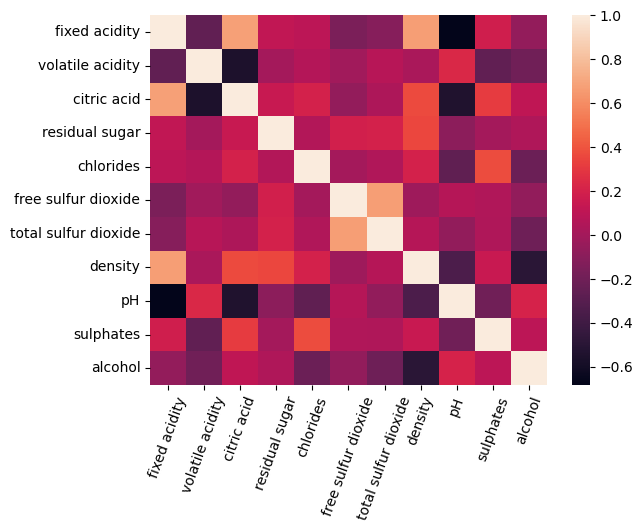

In [33]:
# mapa de calor
sns.heatmap(corr)
plt.xticks(rotation=70)
plt.show()



In [34]:
# Seleccionar las características relevantes
X = data[['volatile acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]

# Seleccionar la variable objetivo
y = data['quality']

# Dividir los datos imputados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

tree = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
prediccion = tree.predict(X_test)
prediccion



array([5, 4, 5, 5, 6, 5, 5, 5, 8, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 4, 6, 6, 6, 7, 5, 5, 6, 5,
       7, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 5, 5, 8, 6, 5, 6, 6,
       6, 6, 7, 5, 6, 5, 6, 4, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       7, 5, 7, 7, 4, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 7,
       7, 5, 7, 5, 5, 7, 6, 4, 5, 5, 7, 6, 6, 6, 7, 5, 7, 5, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 7, 7, 5, 6, 7, 6, 7, 5, 5, 6, 6, 5, 7, 5, 5, 4, 7, 6, 7, 6,
       6, 5, 5, 5, 5, 6, 7, 8, 5, 6, 6, 6, 6, 6, 6, 6, 4, 7, 6, 5, 5, 6,
       6, 7, 5, 6, 5, 5, 7, 4, 4, 4, 6, 6, 8, 5, 5, 7, 6, 4, 6, 5, 7, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 4, 6, 6, 5, 7, 5, 7, 6, 5, 5, 6,
       5, 7, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 4, 6, 7, 8, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 8, 7, 6, 7, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 5, 6, 8, 5, 5, 6, 5, 7, 7, 6, 5,

In [41]:
#Se crea el arbol de decision 
tree = DecisionTreeClassifier()

In [42]:
#Se entrena el arbol de decision
arbol = tree.fit(X_train, y_train)

[Text(0.5149615541643985, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.23664791628863485, 0.9318181818181818, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.3758047352265167, 0.9545454545454546, 'True  '),
 Text(0.041492772031694186, 0.8863636363636364, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015484183148853808, 0.8409090909090909, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011613137361640356, 0.7954545454545454, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007742091574426904, 0.75, 'x[5] <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003871045787213452, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.011613137361640356, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0

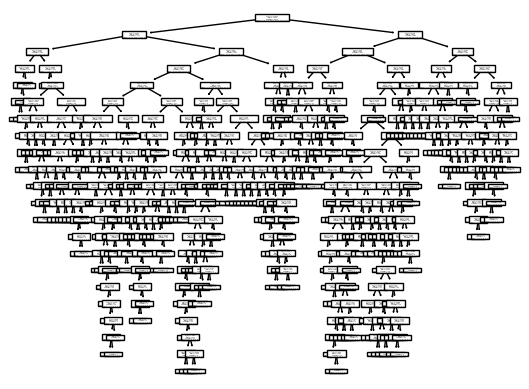

In [43]:
plot_tree(arbol)

In [44]:
predicciones = arbol.predict(X_test)
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 5, 7, 7, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 7, 4, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 8, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 5, 4, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5,

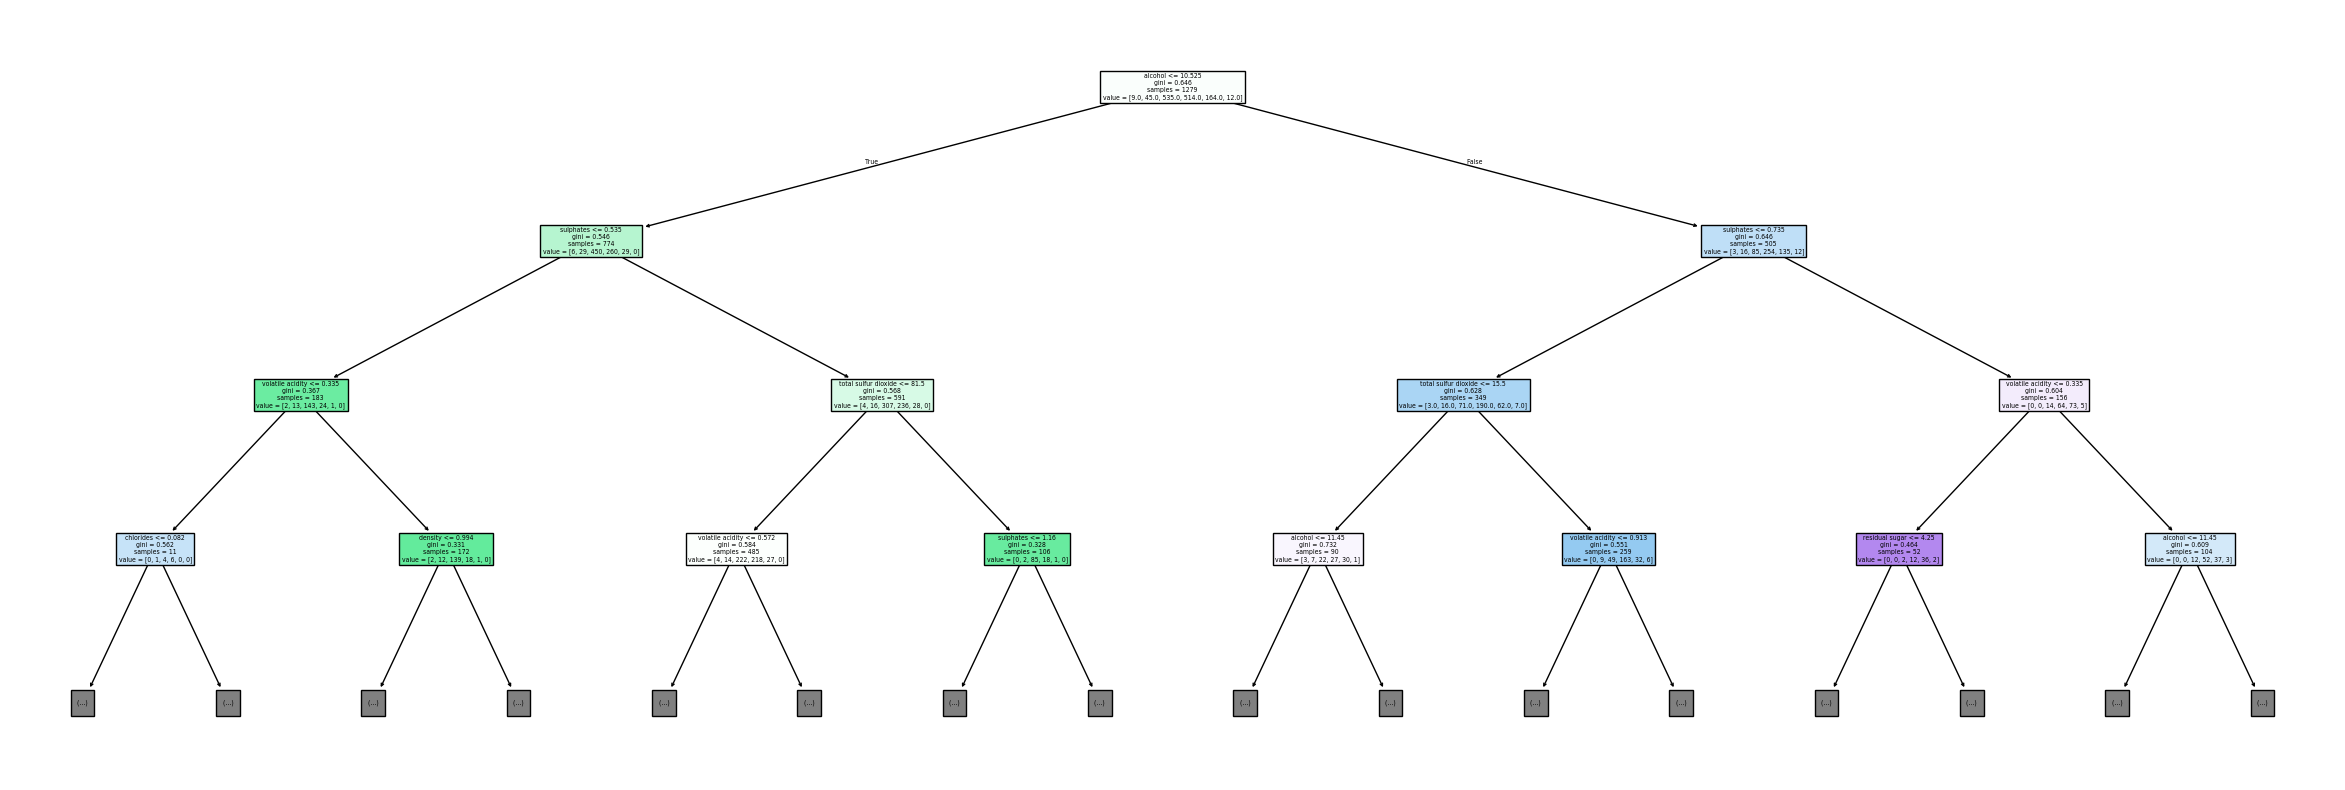

In [45]:
#Visualiza las primeras 5 ramas del árbol de decisión
plt.figure(figsize=(30,10))
plot_tree(arbol, max_depth=3, filled=True, feature_names=X_train.columns)
plt.show()



In [46]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual' ], colnames=['Predicciones' ])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,1,0,0,0,0,0
4,0,2,4,1,1,0
5,1,0,109,30,6,0
6,0,3,34,73,11,3
7,0,0,5,10,20,0
8,0,0,2,2,2,0


In [48]:
#Se mide la exactitud del modelo
accuracy =accuracy_score(y_test,predicciones)
accuracy

0.640625

La exactitud del modelo el de 0.64 o 64% 

In [52]:
#Se mide la precison del modelo
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6330379534258844

La precision del modelo es de 0.63 o 63%

In [54]:
#Se mide el recall del modelo
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.640625

In [55]:
#Se mide el f1 del modelo
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6353798076923076